In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import normalize
from google.colab import drive
drive.mount('/content/gdrive')
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
cd /content/gdrive/'My Drive'/

/content/gdrive/My Drive


# **Лабораторная работа №5**

**Максимов Антон 17ПМИ**

In [0]:
trainQ = pd.read_csv('trainQ.csv')
trainO = pd.read_csv('trainO.csv')
testQ  = pd.read_csv('testQ.csv')
testO  = pd.read_csv('testO.csv')

**Нормализуем данные**

In [0]:
pixels_trainQ = normalize(trainQ.to_numpy())
pixels_trainO = normalize(trainO.to_numpy())
pixels_testQ = normalize(testQ.to_numpy())
pixels_testO = normalize(testO.to_numpy())

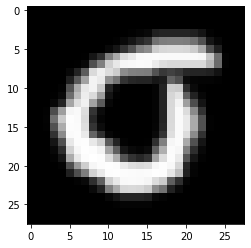

In [288]:
plt.imshow(pixels_testO[306].reshape((28, 28)).T, cmap='gray')

**Соеденим 4 файла в train train_datasetQO и test_datasetQO, добавим лэйблы для Q - 1 , для O - 0**

In [0]:
train_dataQ = np.hstack((np.asarray(pixels_trainQ), np.ones((np.asarray(pixels_trainQ).shape[0], 1), dtype=np.asarray(pixels_trainQ).dtype)))
train_dataO = np.hstack((np.asarray(pixels_trainO), np.zeros((np.asarray(pixels_trainO).shape[0], 1), dtype=np.asarray(pixels_trainO).dtype)))
train_datasetQO = np.concatenate([train_dataQ, train_dataO])
test_dataQ =  np.hstack((np.asarray(pixels_testQ), np.ones((np.asarray(pixels_testQ).shape[0], 1), dtype=np.asarray(pixels_testQ).dtype)))
test_dataO =   np.hstack((np.asarray(pixels_testO), np.zeros((np.asarray(pixels_testO).shape[0], 1), dtype=np.asarray(pixels_testO).dtype)))
test_datasetQO = np.concatenate([test_dataQ, test_dataO])

In [162]:
train_dataQ[:, 0:784].shape

(1000, 784)

In [0]:
pixels_trainQO_labels

##**KNN**

**Кросс - валидация будет при подборе параметров, а пока просто посмотрим как ведет себя классфикатор**

In [184]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = knn.predict(test_datasetQO[:, 0:784])
y_test = test_datasetQO[:, -1]
y_proba = knn.predict_proba(test_datasetQO[:, 0:784])[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9105
ROC AUC: 0.951858


**Посмотрим результаты, если предсказывать Q или O по отедельности**

In [186]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = knn.predict(test_dataQ[:, 0:784])
y_test = test_dataQ[:, -1]
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.827


In [188]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = knn.predict(test_dataO[:, 0:784])
y_test = test_dataO[:, -1]
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.994


**Как и предполагалось, предсказывать легче букву O, как дальше и окажется, для всех классификатор**

###**Подбор параметров**

**Будем подбирать оптимальное кол-во соседов, используя кросс-валидацию**

In [213]:
for i in range(1,21):
  for j in range(2, 9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_cv = cross_val_score(knn, train_datasetQO[:, 0:784], train_datasetQO[:, -1], cv=j)
    #print("Cross Validation score with 2-fold cv =====>>>> ", str(knn_cv_2))
    print("Cross-Validation with {} neighbors Mean_score with {}-fold cv =====>>>> {} ".format(i, j, str(knn_cv.mean())))

Cross-Validation with 1 neighbors Mean_score with 2-fold cv =====>>>> 0.942 
Cross-Validation with 1 neighbors Mean_score with 3-fold cv =====>>>> 0.9460118801436167 
Cross-Validation with 1 neighbors Mean_score with 4-fold cv =====>>>> 0.9465 
Cross-Validation with 1 neighbors Mean_score with 5-fold cv =====>>>> 0.9470000000000001 
Cross-Validation with 1 neighbors Mean_score with 6-fold cv =====>>>> 0.946035639564245 
Cross-Validation with 1 neighbors Mean_score with 7-fold cv =====>>>> 0.9465288232893866 
Cross-Validation with 1 neighbors Mean_score with 8-fold cv =====>>>> 0.945 
Cross-Validation with 2 neighbors Mean_score with 2-fold cv =====>>>> 0.9105000000000001 
Cross-Validation with 2 neighbors Mean_score with 3-fold cv =====>>>> 0.9190028351704997 
Cross-Validation with 2 neighbors Mean_score with 4-fold cv =====>>>> 0.92 
Cross-Validation with 2 neighbors Mean_score with 5-fold cv =====>>>> 0.917 
Cross-Validation with 2 neighbors Mean_score with 6-fold cv =====>>>> 0.9200

**Протестируем, при кол-во соседов = 1**



In [300]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = knn.predict(test_datasetQO[:, 0:784])
y_test = test_datasetQO[:, -1]
y_proba = knn.predict_proba(test_datasetQO[:, 0:784])[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9345
ROC AUC: 0.9345


**Увеличение точности до 0.9345**

###**Дополнительно**

Для KNN найти примеры ошибочной классификации и показать ближайших соседей, объяснить почему была совершена ошибка.

In [267]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = knn.predict(test_datasetQO[:, 0:784])
y_test = test_datasetQO[:, -1]
y_proba = knn.predict_proba(test_datasetQO[:, 0:784])[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9345
ROC AUC: 0.9345


**Найдем индексы объектов, где была соврешена ошибка**

In [268]:
counter = 6 #6 примеров
for i in range(0,len(y_test)):
  if y_test[i]!=y_pred[i]:
    print(i)
    counter-=1
    if counter==0:
      break  


5
13
24
30
31
32


**Выберем 24**

In [233]:
test_datasetQO[24][0:784].shape

(784,)

0.0   1.0


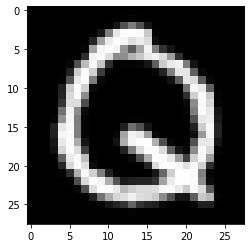

In [289]:
print(y_pred[13]," ", y_test[13])
plt.imshow(test_datasetQO[13][0:784].reshape((28, 28)).T, cmap='gray')

In [0]:
closest_distances, indices = knn.kneighbors(test_datasetQO[:, 0:784], n_neighbors=3)

In [279]:
closest_distances[13], indices[13]

(array([0.54298257, 0.59718675, 0.60875624]), array([1574,  783,  335]))

0.0   0.0


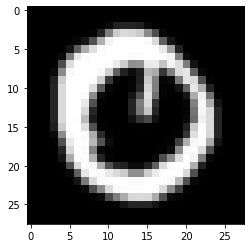

In [291]:
print(y_pred[1574]," ", y_test[1574])
plt.imshow(test_datasetQO[1574][0:784].reshape((28, 28)).T, cmap='gray')

0.0   1.0


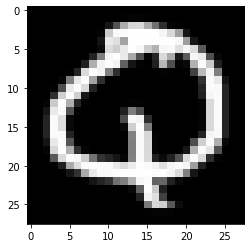

In [292]:
print(y_pred[783]," ", y_test[783])
plt.imshow(test_datasetQO[783][0:784].reshape((28, 28)).T, cmap='gray')

1.0   1.0


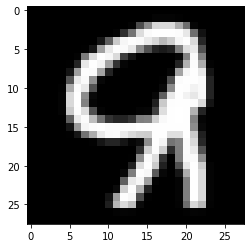

In [294]:
print(y_pred[335]," ", y_test[335])
plt.imshow(test_datasetQO[335][0:784].reshape((28, 28)).T, cmap='gray')

**Итак, по-моему ошибка была совершена, вследствие того что "хвост" Q располагался ближе внутрь, данное предположение подтверждается 3-м соседом, который был определен правильно, и у которого "хвост" явно выпирает**

##**Дерево решений**

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [196]:
DecTree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
DecTree.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = DecTree.predict(test_datasetQO[:, 0:784])
y_test = test_datasetQO[:, -1]
y_proba = DecTree.predict_proba(test_datasetQO[:, 0:784])[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.8675
ROC AUC: 0.8973194999999999


In [197]:
DecTree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
DecTree.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = DecTree.predict(test_dataQ[:, 0:784])
y_test = test_dataQ[:, -1]
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.848


In [198]:
DecTree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
DecTree.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = DecTree.predict(test_dataO[:, 0:784])
y_test = test_dataO[:, -1]
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.887


###**Подбор параметров**

In [245]:
for i in range(1,21):
  for j in range(2, 9):
    DecTree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    DecT = cross_val_score(DecTree, train_datasetQO[:, 0:784], train_datasetQO[:, -1], cv=j)
    print("Cross-Validation with {} max_depth Mean_score with {}-fold cv =====>>>> {} ".format(i, j, str(DecT.mean())))

Cross-Validation with 1 max_depth Mean_score with 2-fold cv =====>>>> 0.827 
Cross-Validation with 1 max_depth Mean_score with 3-fold cv =====>>>> 0.8339911768055481 
Cross-Validation with 1 max_depth Mean_score with 4-fold cv =====>>>> 0.82 
Cross-Validation with 1 max_depth Mean_score with 5-fold cv =====>>>> 0.835 
Cross-Validation with 1 max_depth Mean_score with 6-fold cv =====>>>> 0.8344966693119784 
Cross-Validation with 1 max_depth Mean_score with 7-fold cv =====>>>> 0.8344824189894613 
Cross-Validation with 1 max_depth Mean_score with 8-fold cv =====>>>> 0.835 
Cross-Validation with 2 max_depth Mean_score with 2-fold cv =====>>>> 0.875 
Cross-Validation with 2 max_depth Mean_score with 3-fold cv =====>>>> 0.8764992537447628 
Cross-Validation with 2 max_depth Mean_score with 4-fold cv =====>>>> 0.883 
Cross-Validation with 2 max_depth Mean_score with 5-fold cv =====>>>> 0.8870000000000001 
Cross-Validation with 2 max_depth Mean_score with 6-fold cv =====>>>> 0.8800381165380083 

**Лучший результат с max_depth = 9**

###**Дополнительно**

 Определить, по каким пикселям принимается решение и в чью пользу: O или Q.

In [32]:
DecTree = DecisionTreeClassifier(criterion='entropy', max_depth=9)
DecTree.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = DecTree.predict(test_datasetQO[:, 0:784])
y_test = test_datasetQO[:, -1]
y_proba = DecTree.predict_proba(test_datasetQO[:, 0:784])[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9315
ROC AUC: 0.9315000000000001


In [0]:
n_nodes = DecTree.tree_.node_count
children_left = DecTree.tree_.children_left
children_right = DecTree.tree_.children_right
feature = DecTree.tree_.feature
threshold = DecTree.tree_.threshold

In [0]:
node_indicator = DecTree.decision_path(test_datasetQO[:, 0:784])

In [0]:
leave_id = DecTree.apply(test_datasetQO[:, 0:784])

In [0]:
test = test_datasetQO[:, 0:784]

**Признаки по которым принимаются решения**

In [48]:
feature

array([407, 302, 433, 238, 495, 441,  -2,  -2,  -2, 528, 576,  -2,  -2,
       153,  -2,  -2,  -2, 640, 352, 456, 304, 622,  -2,  -2, 386, 271,
        -2,  -2, 530,  -2,  -2, 570, 209, 372, 413,  -2,  -2,  -2, 618,
        -2,  -2,  -2, 513,  -2, 271, 652,  -2,  -2,  -2, 501,  -2, 631,
       185,  -2,  -2,  -2, 423, 571, 595,  -2, 295,  -2,  -2, 430, 300,
        -2, 249, 131,  -2,  -2,  -2, 242, 686, 320,  -2, 626,  -2,  -2,
        -2,  -2, 219,  -2, 544,  -2, 442,  -2,  -2])

1.0   1.0


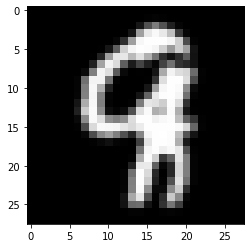

In [55]:
print(y_pred[500]," ", y_test[500])
plt.imshow(test_datasetQO[500][0:784].reshape((28, 28)).T, cmap='gray')

In [56]:
sample_id = 500
node_index = node_indicator.indices[node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]]
print("Rules used to predict sample %s: " % sample_id)
for node_id in node_index:
    if leave_id[sample_id] != node_id:
        continue
    if test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"
    print("Decision id node %s : (X[%s, %s] (= %s) %s %s)" % (node_id, sample_id, feature[node_id], test[sample_id, feature[node_id]], threshold_sign, threshold[node_id]))

Rules used to predict sample 500: 
Decision id node 81 : (X[500, -2] (= 0.0) > -2.0)


**В данном случае решение принимаетсся в пользу Q по признаку 219  X[:, 219] <= 0.0287875784561038**

0.0   0.0


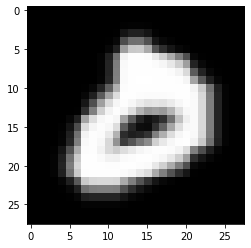

In [62]:
print(y_pred[1600]," ", y_test[1600])
plt.imshow(test_datasetQO[1600][0:784].reshape((28, 28)).T, cmap='gray')

In [63]:
sample_id = 1600
node_index = node_indicator.indices[node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]]
print("Rules used to predict sample %s: " % sample_id)
for node_id in node_index:
    if leave_id[sample_id] != node_id:
        continue
    if test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"
    print("Decision id node %s : (X[%s, %s] (= %s) %s %s)" % (node_id, sample_id, feature[node_id], test[sample_id, feature[node_id]], threshold_sign, threshold[node_id]))

Rules used to predict sample 1600: 
Decision id node 41 : (X[1600, -2] (= 0.0) > -2.0)


**Здесь решение принимаетсся в пользу O по признаку 618  X[:, 618] <= 0.04611745569854975**

**Структура дерева**

In [54]:
node_depth = np.zeros(shape=n_nodes)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if children_left[node_id] != children_right[node_id]:
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
print("The tree structure has %s nodes and has " "the following tree structure:" % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] , i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
            "node %s." % (node_depth[i] , i, children_left[i], feature[i], threshold[i], children_right[i]))
print()

The tree structure has 87 nodes and has the following tree structure:
0.0node=0 test node: go to node 1 if X[:, 407] <= 0.007881436264142394 else to node 56.
1.0node=1 test node: go to node 2 if X[:, 302] <= 0.0002914859214797616 else to node 17.
2.0node=2 test node: go to node 3 if X[:, 433] <= 0.009344716556370258 else to node 16.
3.0node=3 test node: go to node 4 if X[:, 238] <= 0.02224053256213665 else to node 9.
4.0node=4 test node: go to node 5 if X[:, 495] <= 0.0005647527286782861 else to node 8.
5.0node=5 test node: go to node 6 if X[:, 441] <= 0.003612200729548931 else to node 7.
6.0node=6 leaf node.
6.0node=7 leaf node.
5.0node=8 leaf node.
4.0node=9 test node: go to node 10 if X[:, 528] <= 0.006405198248103261 else to node 13.
5.0node=10 test node: go to node 11 if X[:, 576] <= 0.0018222358776256442 else to node 12.
6.0node=11 leaf node.
6.0node=12 leaf node.
5.0node=13 test node: go to node 14 if X[:, 153] <= 0.07545606791973114 else to node 15.
6.0node=14 leaf node.
6.0nod

##**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier 

In [238]:
RanFor = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=2)
RanFor.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = RanFor.predict(test_datasetQO[:, 0:784])
y_test = test_datasetQO[:, -1]
y_proba = RanFor.predict_proba(test_datasetQO[:, 0:784])[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9155
ROC AUC: 0.978051


In [199]:
RanFor = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=2)
RanFor.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = RanFor.predict(test_dataQ[:, 0:784])
y_test = test_dataQ[:, -1]
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.89


In [200]:
RanFor = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=2)
RanFor.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = RanFor.predict(test_dataO[:, 0:784])
y_test = test_dataO[:, -1]
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.937


###**Подбор параметров**

**Предыдущие классификаторы показали, что лучший score получается при cv=9**

In [303]:
for i in range(20,221,20):
  for j in range(1,15):
    RanFor = RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=j)
    RanF = cross_val_score(RanFor, train_datasetQO[:, 0:784], train_datasetQO[:, -1], cv=8)
    print("Cross-Validation with {} n_estimators Mean_score with {} max_depth =====>>>> {} ".format(i, j, str(RanF.mean())))

Cross-Validation with 20 n_estimators Mean_score with 1 max_depth =====>>>> 0.863 
Cross-Validation with 20 n_estimators Mean_score with 2 max_depth =====>>>> 0.9275 
Cross-Validation with 20 n_estimators Mean_score with 3 max_depth =====>>>> 0.9464999999999999 
Cross-Validation with 20 n_estimators Mean_score with 4 max_depth =====>>>> 0.9604999999999999 
Cross-Validation with 20 n_estimators Mean_score with 5 max_depth =====>>>> 0.968 
Cross-Validation with 20 n_estimators Mean_score with 6 max_depth =====>>>> 0.9715 
Cross-Validation with 20 n_estimators Mean_score with 7 max_depth =====>>>> 0.9735 
Cross-Validation with 20 n_estimators Mean_score with 8 max_depth =====>>>> 0.978 
Cross-Validation with 20 n_estimators Mean_score with 9 max_depth =====>>>> 0.975 
Cross-Validation with 20 n_estimators Mean_score with 10 max_depth =====>>>> 0.976 
Cross-Validation with 20 n_estimators Mean_score with 11 max_depth =====>>>> 0.972 
Cross-Validation with 20 n_estimators Mean_score with 12

**Лучший результат 80 estimators c max_depth = 10, протеестируем**

In [309]:
RanFor = RandomForestClassifier(n_estimators=80, criterion='entropy', max_depth=10)
RanFor.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = RanFor.predict(test_datasetQO[:, 0:784])
y_test = test_datasetQO[:, -1]
y_proba = RanFor.predict_proba(test_datasetQO[:, 0:784])[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.976
ROC AUC: 0.995476


###**Дополнительно**

проанализировать feature_importances после применения классификатора.

**Выберем топ-5 признаков-пикселей которые имееют наибольшее влияние**

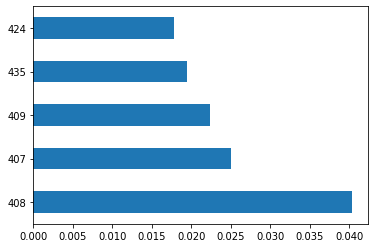

In [310]:
feat_importances = pd.Series(RanFor.feature_importances_, index=testQ.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [313]:
a = np.zeros((28,28))
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

##**AdaBoost SkLearn**

In [0]:
from sklearn.ensemble import AdaBoostClassifier 

**max depth=9 как лучший результат для дерева решений**

In [298]:
AdaBoo = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=100)
AdaBoo.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = AdaBoo.predict(test_datasetQO[:, 0:784])
y_test = test_datasetQO[:, -1]
y_proba = AdaBoo.predict_proba(test_datasetQO[:, 0:784])[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.975
ROC AUC: 0.995817


In [202]:
AdaBoo = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100)
RanFor.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = RanFor.predict(test_dataQ[:, 0:784])
y_test = test_dataQ[:, -1]
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.906


In [203]:
AdaBoo = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100)
RanFor.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = RanFor.predict(test_dataO[:, 0:784])
y_test = test_dataO[:, -1]
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.936


###**Подбор параметров**

In [317]:
for i in range(50,100,10):
  for j in range(2, 10,2):
    AdaBoo = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=i)
    AdaB = cross_val_score(AdaBoo, train_datasetQO[:, 0:784], train_datasetQO[:, -1], cv=j)
    print("Cross-Validation with {} n_estimators Mean_score with {}-fold cv =====>>>> {} ".format(i, j, str(AdaB.mean())))

Cross-Validation with 50 n_estimators Mean_score with 2-fold cv =====>>>> 0.9405 
Cross-Validation with 50 n_estimators Mean_score with 4-fold cv =====>>>> 0.981 
Cross-Validation with 50 n_estimators Mean_score with 6-fold cv =====>>>> 0.9790208739148211 
Cross-Validation with 50 n_estimators Mean_score with 8-fold cv =====>>>> 0.9804999999999999 
Cross-Validation with 60 n_estimators Mean_score with 2-fold cv =====>>>> 0.9455 
Cross-Validation with 60 n_estimators Mean_score with 4-fold cv =====>>>> 0.9804999999999999 
Cross-Validation with 60 n_estimators Mean_score with 6-fold cv =====>>>> 0.9800008416901137 
Cross-Validation with 60 n_estimators Mean_score with 8-fold cv =====>>>> 0.982 
Cross-Validation with 70 n_estimators Mean_score with 2-fold cv =====>>>> 0.9455 
Cross-Validation with 70 n_estimators Mean_score with 4-fold cv =====>>>> 0.978 
Cross-Validation with 70 n_estimators Mean_score with 6-fold cv =====>>>> 0.9810198879349734 
Cross-Validation with 70 n_estimators Mea

**Лучшая точность у 80 n_estimators**

In [318]:
AdaBoo = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=80)
AdaBoo.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])
y_pred = AdaBoo.predict(test_datasetQO[:, 0:784])
y_test = test_datasetQO[:, -1]
y_proba = AdaBoo.predict_proba(test_datasetQO[:, 0:784])[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9735
ROC AUC: 0.995654


###**Дополнительно**

взять XGBoost, CatBoost или LightGBM библиотеку, сравнить результаты с SkLearn

In [0]:
!pip install catboost

In [0]:
from catboost import CatBoostClassifier #КОТИКИ!!!!

In [0]:
model = CatBoostClassifier(iterations=100,depth=21, learning_rate=1, loss_function='Logloss', verbose=True)

In [0]:
model = CatBoostClassifier(iterations=500,depth=9, learning_rate=1, loss_function='Logloss', verbose=True)

In [23]:
model.fit(train_datasetQO[:, 0:784], train_datasetQO[:, -1])

0:	learn: 0.1536983	total: 1.18s	remaining: 9m 48s
1:	learn: 0.0774813	total: 2.09s	remaining: 8m 40s
2:	learn: 0.0439826	total: 3.02s	remaining: 8m 20s
3:	learn: 0.0280266	total: 3.95s	remaining: 8m 10s
4:	learn: 0.0187360	total: 4.87s	remaining: 8m 1s
5:	learn: 0.0136132	total: 5.78s	remaining: 7m 56s
6:	learn: 0.0105994	total: 6.73s	remaining: 7m 54s
7:	learn: 0.0091486	total: 7.65s	remaining: 7m 50s
8:	learn: 0.0072486	total: 8.57s	remaining: 7m 47s
9:	learn: 0.0060236	total: 9.49s	remaining: 7m 45s
10:	learn: 0.0056833	total: 10.4s	remaining: 7m 43s
11:	learn: 0.0048955	total: 11.3s	remaining: 7m 40s
12:	learn: 0.0047580	total: 12.2s	remaining: 7m 38s
13:	learn: 0.0043890	total: 13.1s	remaining: 7m 36s
14:	learn: 0.0037541	total: 14.1s	remaining: 7m 34s
15:	learn: 0.0032845	total: 15s	remaining: 7m 32s
16:	learn: 0.0030175	total: 15.9s	remaining: 7m 30s
17:	learn: 0.0027479	total: 16.8s	remaining: 7m 30s
18:	learn: 0.0025542	total: 17.7s	remaining: 7m 28s
19:	learn: 0.0022982	tota

**Оптимальная глубина такая же как и AdaBoost Sklearn, обучение довольно быстрое но даже при 500 итерациях не догоняет sklearn, хотя очень близко**

In [24]:
y_pred = model.predict(test_datasetQO[:, 0:784])
y_proba = model.predict_proba(test_datasetQO[:, 0:784])[:, 1]
y_test = test_datasetQO[:, -1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9685
ROC AUC: 0.9946330000000001


AdaBoost Accuracy: 0.9735